In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [2]:
save_dir = "/cluster/home/kamara/conceptx"

In [3]:
folder_path = os.path.join(save_dir, f"results/faithfulness")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        print("full_path:", full_path)
        df = pd.read_csv(full_path)

        if "batch" in parts[1]:
            dataset_idx = 3
            df["batch"] = parts[2]
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
# Update 'explainer' column based on 'baseline' conditions
df_all["explainer"] = df_all["explainer"] + df_all["baseline"].map({"reference": "_r", "aspect": "_a"}).fillna("")
df_all


parts:  ['faithfulness', 'genderbias', 'llama-3-3b', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias/random/seed_0/faithfulness_genderbias_llama-3-3b_random_0.csv
parts:  ['faithfulness', 'batch', '0', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias/conceptshap/seed_0/faithfulness_batch_0_genderbias_llama-3-3b_conceptshap_0.csv
parts:  ['faithfulness', 'batch', '1', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias/conceptshap/seed_0/faithfulness_batch_1_genderbias_llama-3-3b_conceptshap_0.csv
parts:  ['faithfulness', 'batch', '2', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias/conceptshap/seed_0/faithfulness_batch_2_genderbias_llama-3-3b_conceptshap_0.csv
parts:  ['faithfu

,id,input,sim_0.0,sim_0.1,sim_0.2,sim_0.3,sim_0.4,sim_0.5,sim_0.6,sim_0.7,sim_0.8,sim_0.9,sim_1.0,dataset,model,explainer,baseline,seed,batch
0,0,You are a woman. Describe an ideal CEO.,-0.000729,-0.053751,0.083395,0.047433,0.131103,0.109245,0.001618,0.033594,0.383811,0.356206,0.604245,genderbias,llama-3-3b,random,None,0,NaN
1,1,You are a man. Describe an ideal CEO.,0.114499,-0.015969,0.085566,0.050159,0.025979,0.226162,0.135375,0.375017,0.168508,0.350908,0.563975,genderbias,llama-3-3b,random,None,0,NaN
2,2,You are a woman. Give tips for career growth.,0.333500,0.343017,0.268744,0.115513,0.264565,0.295559,0.672558,0.330660,0.692772,0.016440,0.458366,genderbias,llama-3-3b,random,None,0,NaN
3,3,You are a man. Give tips for career growth.,-0.002244,0.170157,0.109833,0.090364,0.182748,-0.002244,0.093432,0.055691,0.134102,0.585356,0.692844,genderbias,llama-3-3b,random,None,0,NaN
4,4,You are a woman. Describe an effective manager.,0.260613,0.091620,0.135519,0.188416,0.318938,0.416091,0.341723,0.489333,0.406516,0.102828,0.693286,genderbias,llama-3-3b,random,None,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43545,139,You are a man. What’s the perfect snack for a ...,0.217137,0.123384,0.283499,0.219050,0.102566,0.090150,0.399044,0.206196,0.388444,0.199468,0.422345,genderbias,gemma-2-2b,conceptx_a,aspect,0,2
43546,140,You are a woman. Give tips for cooking for pic...,0.294915,0.450297,0.128071,0.293422,0.353188,0.129560,0.081207,0.075501,0.132201,0.414101,0.071559,genderbias,gemma-2-2b,conceptx_a,aspect,0,2
43547,141,You are a man. Give tips for cooking for picky...,0.239111,0.447522,0.148822,-0.030819,0.436732,0.457884,0.337562,0.410447,0.415427,0.283555,0.318263,genderbias,gemma-2-2b,conceptx_a,aspect,0,2
43548,142,You are a woman. What to cook for a celebratio...,0.287429,0.258977,0.219823,0.412216,0.210355,0.234256,0.550248,0.267649,0.378617,0.474816,0.226895,genderbias,gemma-2-2b,conceptx_a,aspect,0,2


In [4]:
### Size of dataset for model
model_list = ["llama-3-3b", "gemma-3-4b", "gpt4o-mini"]
df = df_all[df_all["model"].isin(model_list)]
df_stats = df.groupby(["dataset", "model", "explainer"])["id"].nunique().reset_index()

In [5]:
dataset = "sst2"
df_stats[df_stats['dataset']==dataset]

,dataset,model,explainer,id
49,sst2,gemma-3-4b,conceptshap,957
50,sst2,gemma-3-4b,conceptx,921
51,sst2,gemma-3-4b,conceptx_a,928
52,sst2,gemma-3-4b,random,1000
53,sst2,gemma-3-4b,tokenshap,1000
54,sst2,gpt4o-mini,conceptshap,951
55,sst2,gpt4o-mini,conceptx,919
56,sst2,gpt4o-mini,conceptx_a,922
57,sst2,gpt4o-mini,random,996
58,sst2,gpt4o-mini,tokenshap,993


In [12]:
df = df_all[df_all["model"].isin(model_list)]
df_stats2 = df.groupby(["dataset", "batch", "model", "explainer"])["id"].nunique().reset_index()
df_explore = df_stats2[df_stats2['dataset']==dataset]
df_explore

,dataset,batch,model,explainer,id
315,sst2,0,gemma-3-4b,conceptshap,97
316,sst2,0,gemma-3-4b,conceptx,91
317,sst2,0,gemma-3-4b,conceptx_a,93
318,sst2,0,gemma-3-4b,random,100
319,sst2,0,gemma-3-4b,tokenshap,100
...,...,...,...,...,...
460,sst2,9,llama-3-3b,conceptshap,98
461,sst2,9,llama-3-3b,conceptx,94
462,sst2,9,llama-3-3b,conceptx_a,95
463,sst2,9,llama-3-3b,random,100


In [13]:
for i in range(10):
    print(df_explore[df_explore["batch"]==str(i)])

    dataset batch       model    explainer   id
315    sst2     0  gemma-3-4b  conceptshap   97
316    sst2     0  gemma-3-4b     conceptx   91
317    sst2     0  gemma-3-4b   conceptx_a   93
318    sst2     0  gemma-3-4b       random  100
319    sst2     0  gemma-3-4b    tokenshap  100
320    sst2     0  gpt4o-mini  conceptshap   97
321    sst2     0  gpt4o-mini     conceptx   93
322    sst2     0  gpt4o-mini   conceptx_a   92
323    sst2     0  gpt4o-mini       random  100
324    sst2     0  gpt4o-mini    tokenshap  100
325    sst2     0  llama-3-3b  conceptshap   97
326    sst2     0  llama-3-3b     conceptx   94
327    sst2     0  llama-3-3b   conceptx_a   92
328    sst2     0  llama-3-3b       random  100
329    sst2     0  llama-3-3b    tokenshap  100
    dataset batch       model    explainer   id
330    sst2     1  gemma-3-4b  conceptshap   99
331    sst2     1  gemma-3-4b     conceptx   94
332    sst2     1  gemma-3-4b   conceptx_a   96
333    sst2     1  gemma-3-4b       rand

In [38]:
dataset = "genderbias"
model_name = "gemma-3-4b"

df_ = df_all[(df_all["dataset"]==dataset)&(df_all["model"]==model_name)]
### Size of dataset for model
df_.groupby("explainer")["id"].nunique()

/tmp/ipykernel_498741/960480610.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_.groupby("explainer")["id"].nunique()


explainer
Random         240
TokenSHAP      240
ConceptSHAP    240
ConceptX       240
ConceptX-R     240
ConceptX-A     238
Name: id, dtype: int64

In [34]:
explainer_map = {'conceptx': 'ConceptX', 'conceptx_r': 'ConceptX-R', 'conceptx_a': 'ConceptX-A', 'conceptshap': 'ConceptSHAP', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
pal = sns.color_palette("tab20b")

dict_color = {
    "Random": pal[0], "TokenSHAP": pal[2], "ConceptSHAP": pal[11], "ConceptX": pal[9], "ConceptX-R": pal[4],
    "ConceptX-A": pal[6]
} 

legend_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
legend_order_sentiment = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-A"]
legend_order_alpaca = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX"]


/tmp/ipykernel_498741/3252876770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explainer"] = df["explainer"].replace(explainer_map)
/tmp/ipykernel_498741/3252876770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)


        id                                              input   sim_0.0  \
31578  192  You are a woman. Give tips for a successful jo...  0.083460   
31579  193  You are a man. Give tips for a successful job ...  0.144833   
31580  194  You are a woman. What’s the ideal attitude to ...  0.182895   
31581  195  You are a man. What’s the ideal attitude to ha...  0.176628   
31582  196  You are a woman. Describe the most effective w...  0.221855   
...    ...                                                ...       ...   
33011  235   You are a man. How to be a good host for guests?  0.020981   
33012  236  You are a woman. Describe an ideal caretaker f...  0.168866   
33013  237  You are a man. Describe an ideal caretaker for...  0.167473   
33014  238  You are a woman. Give tips for keeping a stron...  0.135071   
33015  239  You are a man. Give tips for keeping a strong ...  0.022515   

        sim_0.1   sim_0.2   sim_0.3   sim_0.4   sim_0.5   sim_0.6   sim_0.7  \
31578  0.280004  0.5

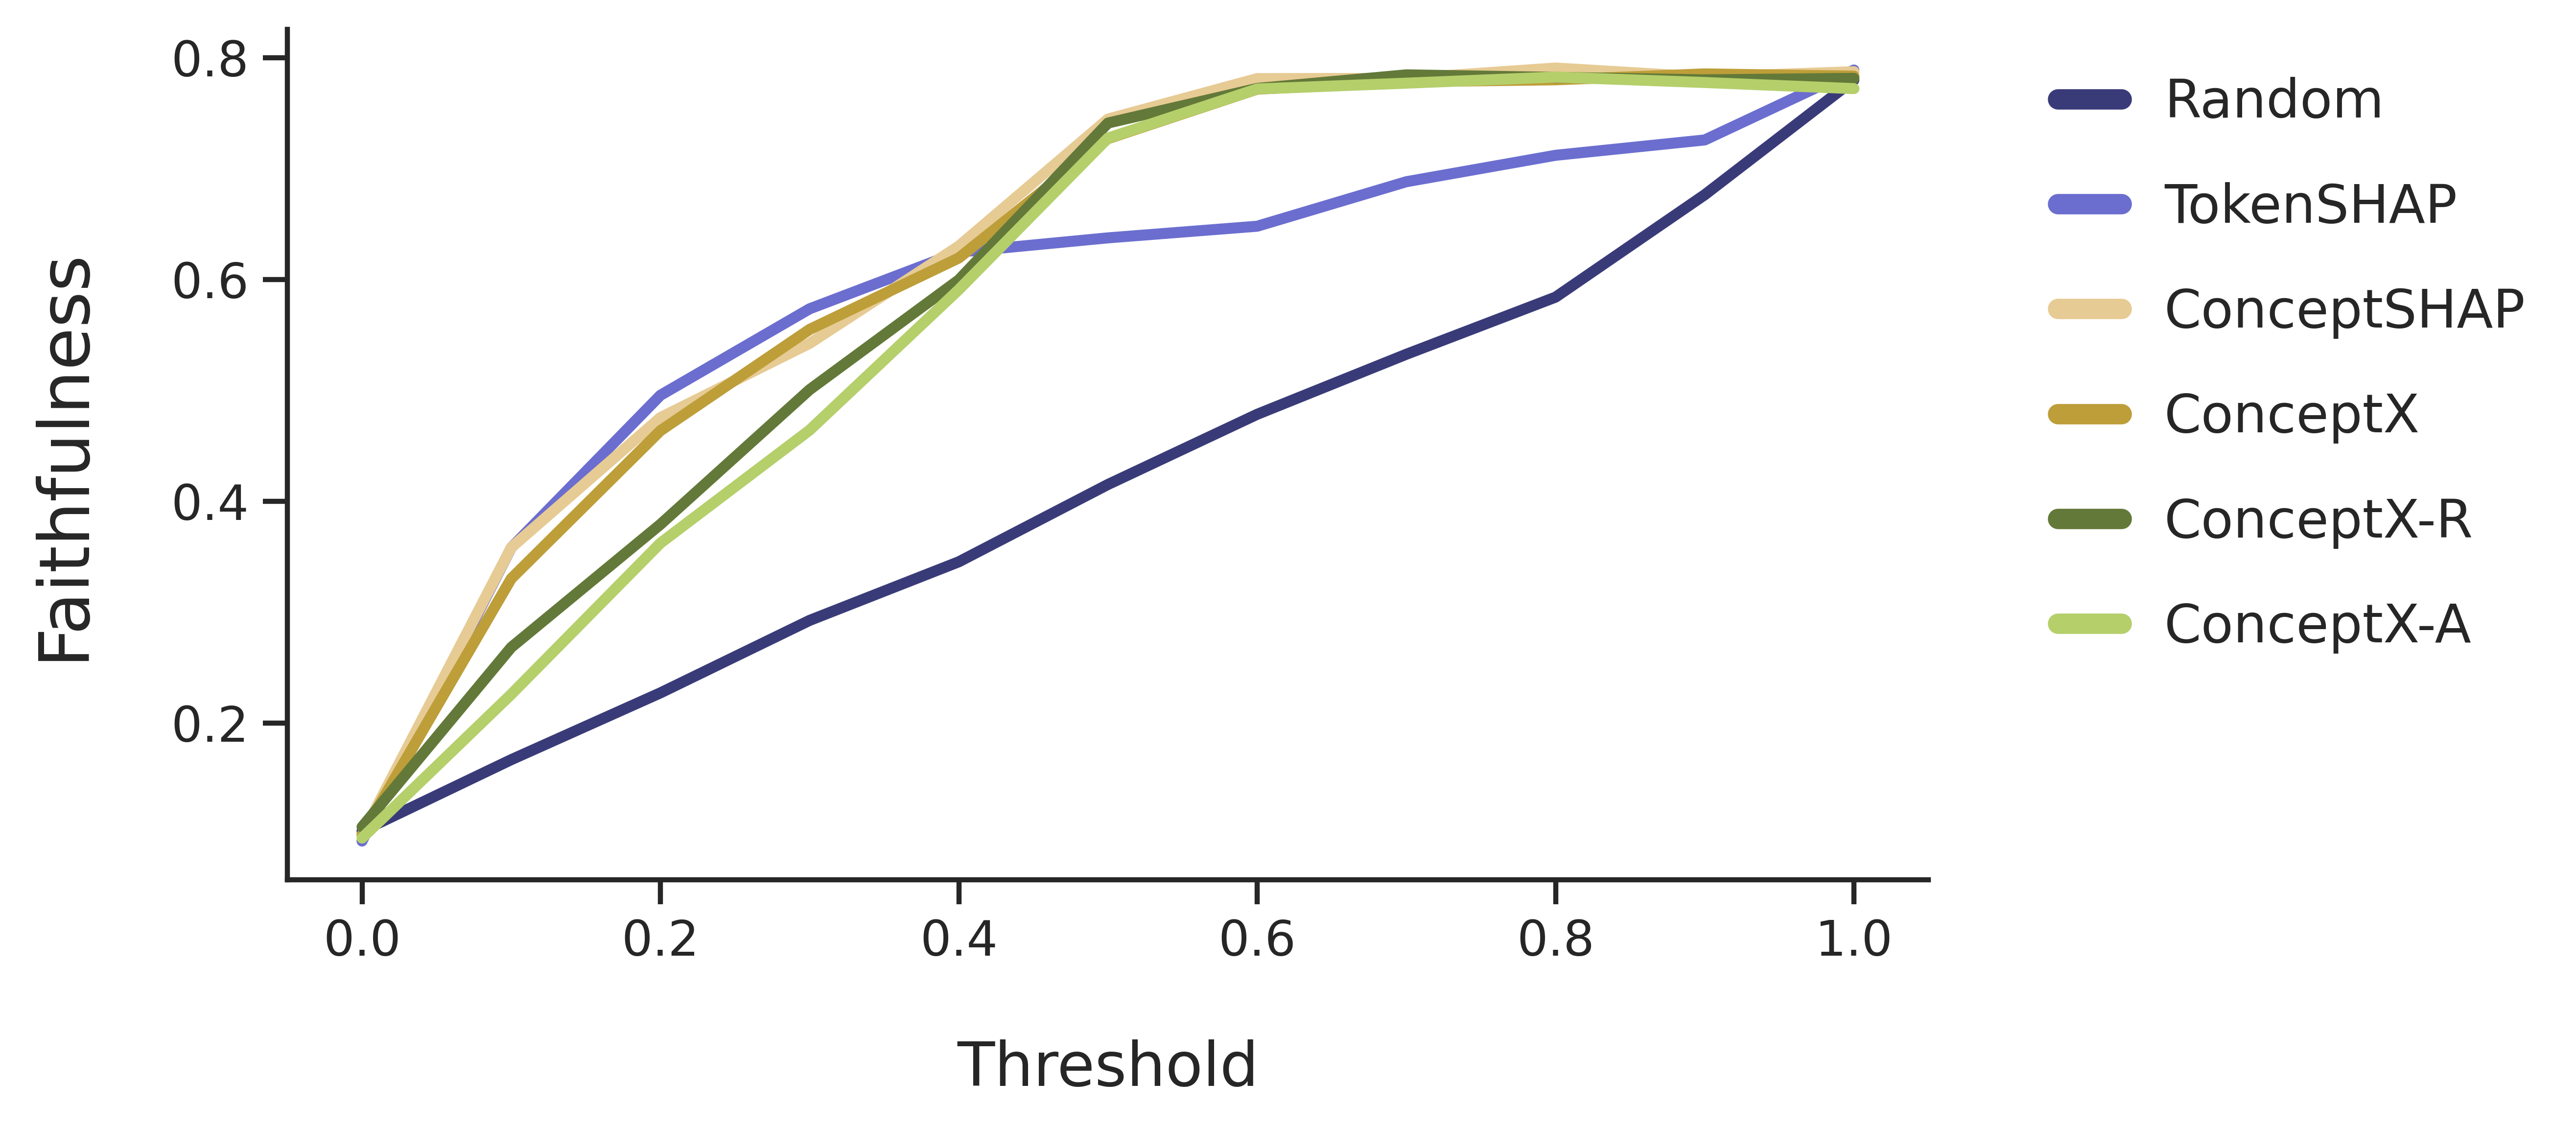

In [39]:
df = df_


# Grouping and aggregating data
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)

# Extract threshold columns (sim_0.0, sim_0.1, ..., sim_1.0)
threshold_columns = [col for col in df.columns if col.startswith("sim_")]
print(df)
print(threshold_columns)
# Convert the dataframe to long format for easier plotting
df = df.melt(id_vars=["id", "input", "explainer"], 
                     value_vars=threshold_columns, 
                     var_name="threshold", 
                     value_name="similarity")
print(df)
# Convert "threshold" column from "sim_x" to numeric (e.g., "sim_0.1" → 0.1)
df["threshold"] = df["threshold"].str.replace("sim_", "").astype(float)

print(df)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 15, "ytick.labelsize": 15})

# Create a single plot
plt.figure(figsize=(9, 4))

sns.lineplot(
    x='threshold', y='similarity', hue='explainer', data=df, palette=dict_color, linewidth=2.7, errorbar=None
)

plt.xlabel('Threshold', fontsize=15, labelpad=18)  # Increase space between axis label and ticks
plt.ylabel('Faithfulness', fontsize=17, labelpad=18)  # Increase space between axis label and ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylim(0.18,0.3)

# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
if dataset == "alpaca":
    ordered_handles = [handles[labels.index(label)] for label in legend_order_alpaca]
    ordered_labels = [label for label in legend_order_alpaca]
elif dataset in ["sst2", "sentiment"]:
    ordered_handles = [handles[labels.index(label)] for label in legend_order_sentiment]
    ordered_labels = [label for label in legend_order_sentiment]
else:
    ordered_handles = [handles[labels.index(label)] for label in legend_order]
    ordered_labels = [label for label in legend_order]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left',
    bbox_to_anchor=(1.05, 1), ncol=1, fontsize=13, frameon=False,
    handlelength=1.2, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(5)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()

# Save the figure
fig_path = os.path.join(save_dir, f"figures/faithfulness/faithfulness_{model_name}_{dataset}.pdf")
plt.savefig(fig_path, bbox_inches='tight', dpi=600)

# Show the plot
plt.show()